In [202]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns

save_to="./ej1.2.png"
dt="5.0"
file_paths = [
  "../gear5-" + dt +".txt",
  "../verlet-" + dt +".txt",
  "../beeman-" + dt +".txt",
  "../analytic-" + dt +".txt"
]
labels = [
  "Gear Predictor-Corrector de orden 5",
  "Verlet",
  "Beeman",
  "Analytic Solution"
]


In [203]:
#parse a file
def get_data(path):
  data = []

  with open(path, 'r') as file:
    lines = file.readlines()
    i = 0
    j = 0
    while i < len(lines):
      if j == 0:
        time = float(lines[i].strip())
        j = 1
      elif j ==1:
        parts = lines[i].split()
        position = float(parts[0])
        #velocity = float(parts[1])
        data.append((time, position))
        j = 0

      i += 1

  #r, t = zip(*data)
  #return (r,t)
  return data

['Gear Predictor-Corrector de orden 5', 'Verlet', 'Beeman', 'Analytic Solution']


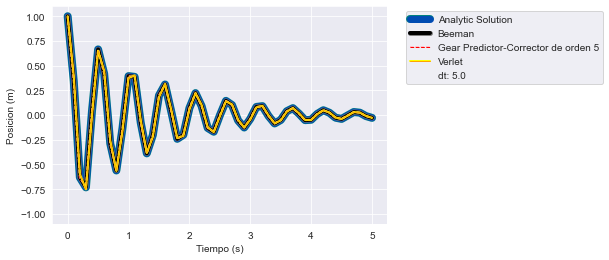

In [204]:
sns.set_style("darkgrid")
plt.tight_layout()
#plt.savefig()

analytic = get_data(file_paths[3])
r,t=zip(*analytic)
plt.plot(r,t,label=labels[3], linewidth=7, alpha=0.4, color='blue', path_effects=[pe.Stroke(linewidth=8, foreground='teal'), pe.Normal()])

beeman = get_data(file_paths[2])
r,t = zip(*beeman)
plt.plot(r,t,label=labels[2], linewidth=4, color='black',
         path_effects=[pe.Stroke(linewidth=5, foreground='grey'), pe.Normal()])

gear5 = get_data(file_paths[0])
r,t = zip(*gear5)
plt.plot(r, t, label=labels[0], linewidth=1, color='red', linestyle='dashed',path_effects=[pe.Stroke(linewidth=2, foreground='pink'), pe.Normal()])

verlet = get_data(file_paths[1])
r,t = zip(*verlet)
plt.plot(r,t, label=labels[1], linewidth=1, color='orange',
         path_effects=[pe.Stroke(linewidth=2, foreground='yellow'), pe.Normal()])



print(labels)



#plt.plot(r, t, label=f'testing...')

plt.ylim((-1.1, 1.1))

plt.xlabel('Tiempo (s)')
plt.ylabel('Posicion (m)')
plt.plot([], [], '', label=f"dt: " + dt, alpha= 0)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
#plt.show()
plt.savefig(save_to, bbox_inches='tight', dpi=1200)